# HEART FAILURE TO DEATH

# Why Does Heart failure need machine learning? 

# What are some benefits from Heart failure machine learnings? 

# Limitaions of Heart failure machine learnings?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle


In [ ]:
url = "https://dataanalytics-2021.s3.ap-southeast-2.amazonaws.com/heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(url)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


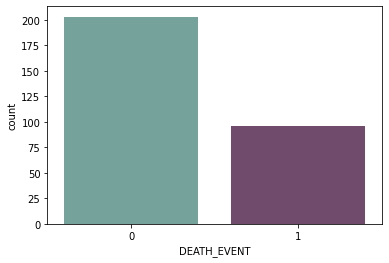

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not 
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

In [ ]:
# Point to note is that there is an imbalance in the data

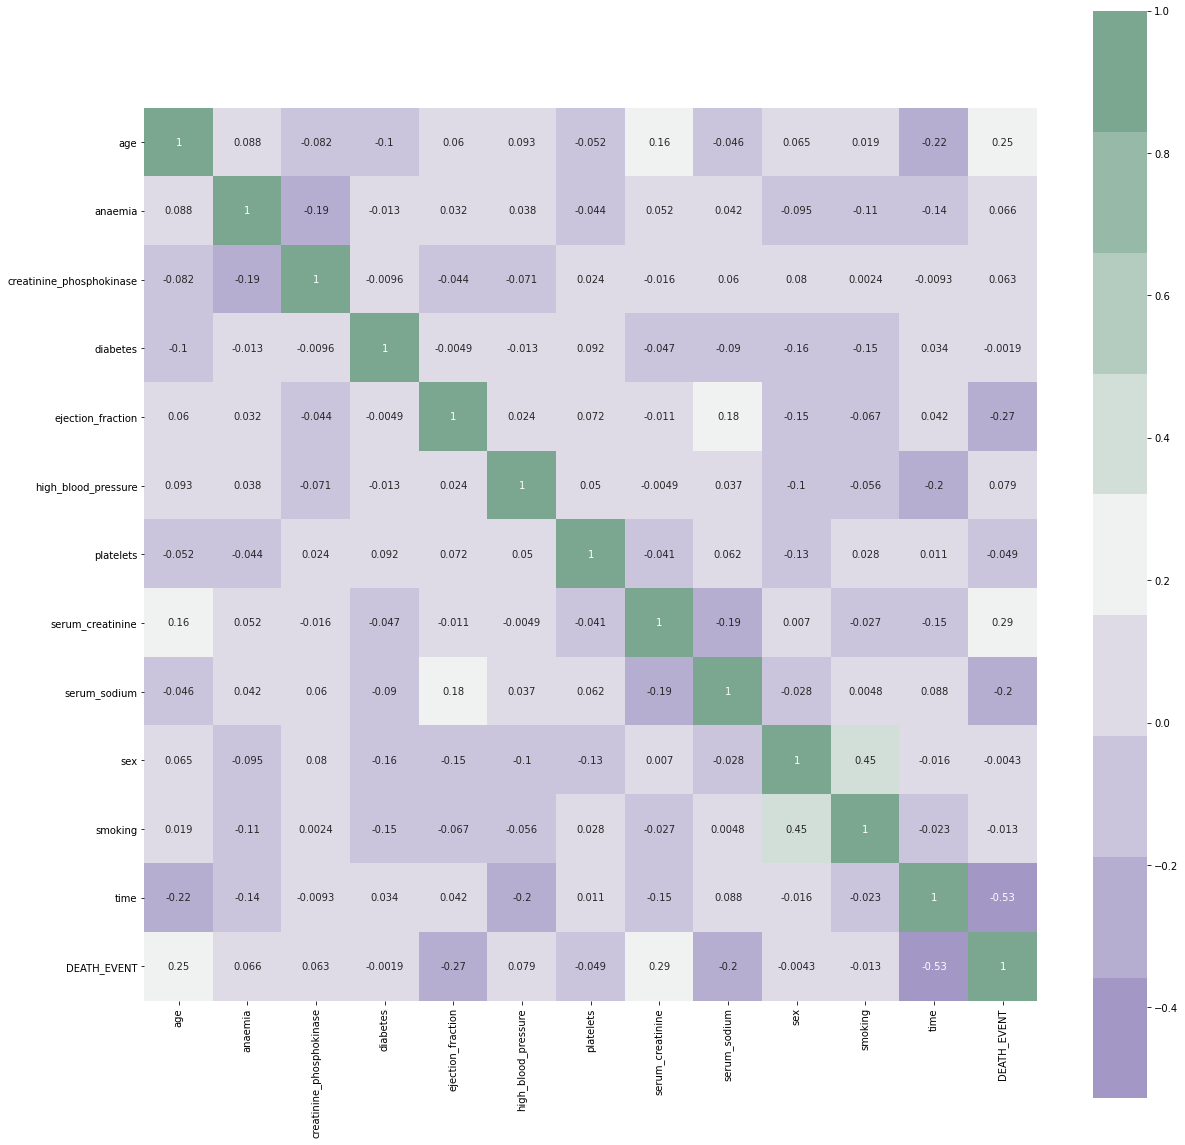

In [ ]:
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

In [ ]:
corrmat[abs(corrmat['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [ ]:
y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis =1)

In [ ]:
#we need to put all X data together by scaled Data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206


In [ ]:
#because our dataset is relatively small we can put trainsize to 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)
accuracy_list = []
f1_list =[]
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'Neural Network','Random forest']

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
log_y_predict = model.predict(X_test)
Log_accuracy = model.score(X_test, y_test)
accuracy_list.append(100*Log_accuracy)

Log_f1 = f1_score(y_test, log_y_predict)
f1_list.append(100*Log_f1)

print(f"Logistic Regression:\nAccuracy: {Log_accuracy}\nF1 Score: {Log_f1}\n")

Logistic Regression:
Accuracy: 0.8466666666666667
F1 Score: 0.6933333333333335



In [ ]:
model = SVC()
model.fit(X_train, y_train)
svm_y_predict = model.predict(X_test)

svm_accuracy = model.score(X_test, y_test)
accuracy_list.append(100*svm_accuracy)

svm_f1 = f1_score(y_test, svm_y_predict)
f1_list.append(100*svm_f1)

print(f"Support Vector Machine:\nAccuracy: {svm_accuracy}\nF1 Score: {svm_f1}\n")

Support Vector Machine:
Accuracy: 0.82
F1 Score: 0.6301369863013698



In [ ]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
knn_y_predict = model.predict(X_test)

knn_accuracy = model.score(X_test, y_test)
accuracy_list.append(100*knn_accuracy)

knn_f1 = f1_score(y_test, knn_y_predict)
f1_list.append(100*knn_f1)
print(f"K Neighbors Classifier :\nAccuracy: {knn_accuracy}\nF1 Score: {knn_f1}\n")

K Neighbors Classifier :
Accuracy: 0.6866666666666666
F1 Score: 0.22950819672131148



In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
model.fit(X_train,y_train)
dt_y_predict = model.predict(X_test)

dt_accuracy = model.score(X_test, y_test)
accuracy_list.append(100*dt_accuracy)

dt_f1 = f1_score(y_test, dt_y_predict)
f1_list.append(100*dt_f1)
print(f"Decision Tree Classifier :\nAccuracy: {dt_accuracy}\nF1 Score: {dt_f1}\n")

Decision Tree Classifier :
Accuracy: 0.8066666666666666
F1 Score: 0.7289719626168223



In [ ]:
model = MLPClassifier(hidden_layer_sizes = (128,128))
model.fit(X_train, y_train)
nn_y_predict = model.predict(X_test)

nn_accuracy = model.score(X_test, y_test)
accuracy_list.append(100*nn_accuracy)

nn_f1 = f1_score(y_test, nn_y_predict)
f1_list.append(100*nn_f1)
print(f"Neural Network :\nAccuracy:{nn_accuracy}\nF1 Score: {nn_f1}\n")

Neural Network :
Accuracy:0.8
F1 Score: 0.6938775510204082



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
model = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
model.fit(X_train, y_train)
rf_y_predict = model.predict(X_test)

rf_accuracy = model.score(X_test, y_test)
accuracy_list.append(100*rf_accuracy)

rf_f1 = f1_score(y_test, rf_y_predict)
f1_list.append(100*rf_f1)
print(f"Random Forest :\nAccuracy:{rf_accuracy}\nF1 Score: {rf_f1}\n")


Random Forest :
Accuracy:0.82
F1 Score: 0.7216494845360825



In [ ]:
#according to table from BMC 
# https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/4
# OUR TEST result pretty good(accurate)

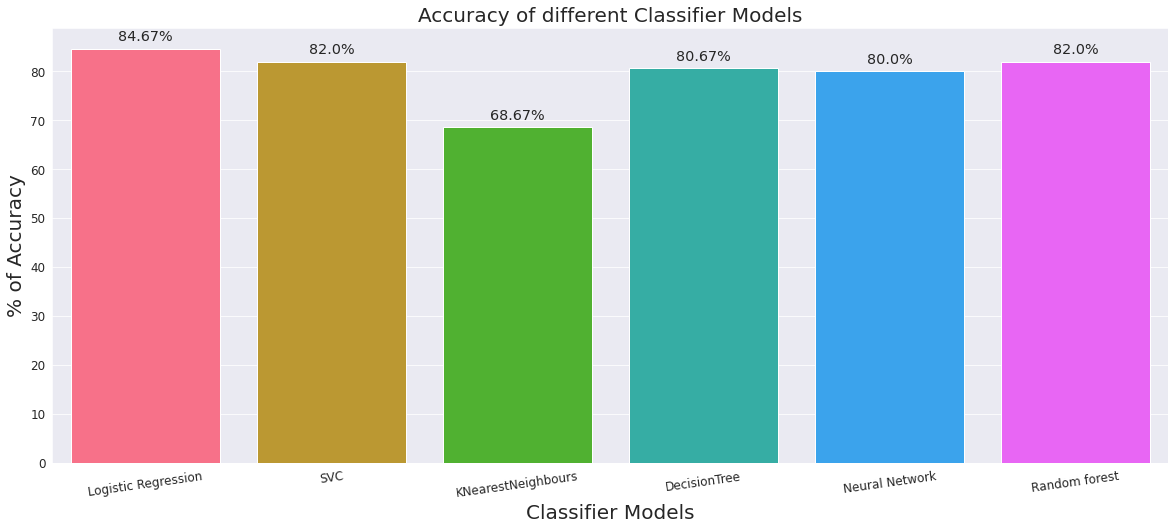

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list,  palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,log_y_predict)
cm_svm = confusion_matrix(y_test,svm_y_predict)
cm_knn = confusion_matrix(y_test,knn_y_predict)
cm_dtc = confusion_matrix(y_test,dt_y_predict)
cm_nn = confusion_matrix(y_test,nn_y_predict)
cm_rf = confusion_matrix(y_test,rf_y_predict)


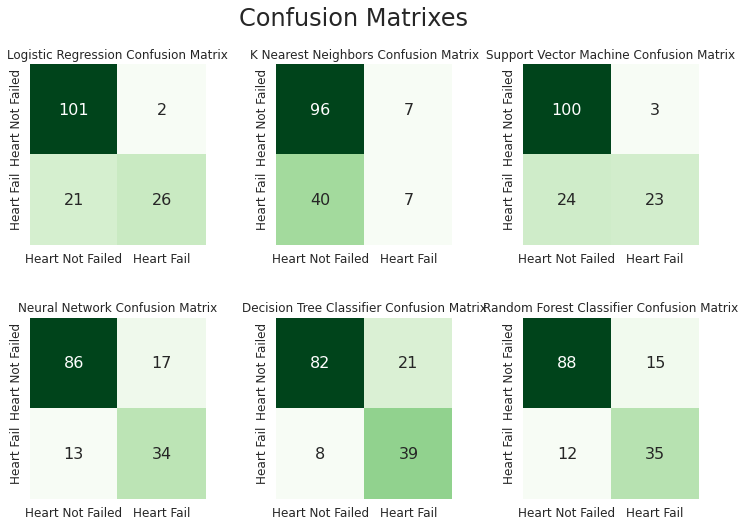

In [ ]:
plt.figure(figsize=(12,8))


plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)


plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xticks(np.arange(2)+0.5, ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.yticks([0.1,1.25], ["Heart Not Failed","Heart Fail"], fontsize=12)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xticks(np.arange(2)+0.5, ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.yticks([0.1,1.25], ["Heart Not Failed","Heart Fail"], fontsize=12)


plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xticks(np.arange(2)+0.5, ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.yticks([0.1,1.25], ["Heart Not Failed","Heart Fail"], fontsize=12)


plt.subplot(2,3,4)
plt.title("Neural Network Confusion Matrix")
sns.heatmap(cm_nn,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xticks(np.arange(2)+0.5, ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.yticks([0.1,1.25], ["Heart Not Failed","Heart Fail"], fontsize=12)


plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xticks(np.arange(2)+0.5, ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.yticks([0.1,1.25], ["Heart Not Failed","Heart Fail"], fontsize=12)

plt.subplot(2,3,6)
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 16})
plt.xticks(np.arange(2)+0.5, ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.yticks([0.1,1.25], ["Heart Not Failed","Heart Fail"], fontsize=12)


plt.show()

In [ ]:
pickle.dump(model_RNF, open('model.pkl','wb'))

In [ ]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[12,1,0,0,0,1,1,0.290823,1,0,1,0]]))

In [ ]:
# https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/4

Survival analysis is a branch of statistics for analyzing the expected duration of time until one or more events happen, such as death in biological organisms(such as heart failure) and failure in mechanical systems. This topic is called reliability theory or reliability analysis in engineering, duration analysis or duration modelling in economics, and event history analysis in sociology. Survival analysis attempts to answer certain questions, such as what is the proportion of a population which will survive past a certain time? Of those that survive, at what rate will they die or fail? Can multiple causes of death or failure be taken into account? How do particular circumstances or characteristics increase or decrease the probability of survival?

Medicine => drug efficacy
Economics => Credit risk
Legal => Predictors of criminal recidivism
Marketing => Customer retention
Company can even use for predict staff turnover !





In [ ]:
!pip install lifelines

import pandas as pd
from lifelines import CoxPHFitter 

     |████████████████████████████████| 358kB 28.4MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4050 sha256=c94b77bc2b8294e00f5d7758f88e45eee34d92c470b7eb96c6a4608f1e57c413
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [ ]:
url = "https://dataanalytics-2021.s3.ap-southeast-2.amazonaws.com/heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(url)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
cph = CoxPHFitter()

The output message about right-censoring from the fitting means that 203 individual had not died at the time of their follow-up examination at the hospital. From the summary statistics above we know that the mean follow-up period was 130 days, but ranging from 4 to 285 days. The varying follow-up period for the individual patients is why we cannot treat this as a classification problem.

It's an important point that the time column records the number of days until death for the patients that died, but the number of days until the last follow-up, for the patients that did not yet die. This is what allows the Cox model to determine the risk of death over time, rather than as a point event.

In [ ]:
#using Cox Proportional Hazards model fit our data
cph.fit(data, duration_col='time', event_col='DEATH_EVENT')

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>

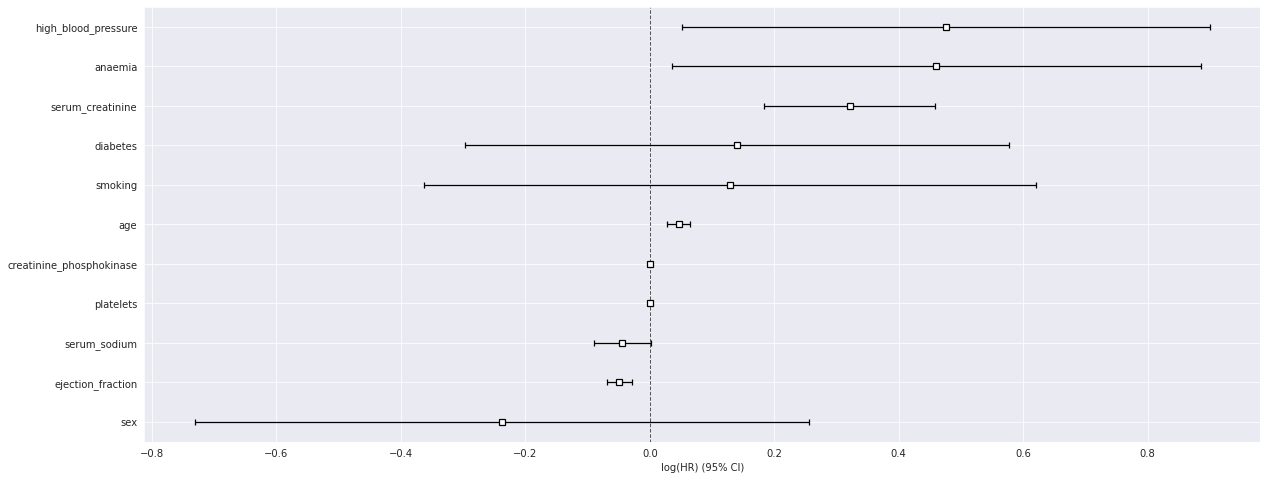

In [ ]:
cph.plot()

In [ ]:
cph.print_summary(columns=["coef","exp(coef)","exp(coef) lower 95%","exp(coef) upper 95%", "z", "p"], decimals=3)

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -468.228
         time fit was run = 2021-07-09 11:46:51 UTC

---
                           coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      z       p
covariate                                                                                          
age                       0.046      1.048                1.029                1.067  4.977 <0.0005
anaemia                   0.460      1.584                1.036                2.423  2.122   0.034
creatinine_phosphokinase  0.000      1.000                1.000                1.000  2.226   0.026
diabetes                  0.140      1.150                0.743                1.781  0.627   0.531
ejection_fraction        -0.049      0.952                0.933                0.972 -4.672 <0.0005
high_blood_pressure       0.476      1.609                1.053                2.458  2.201   0.028
platelets                -0.000      1.000                1.000                1.000 -0.412   0.681
serum_creatinine          0.321      1.379                1.201                1.582  4.575 <0.0005
serum_sodium             -0.044      0.957                0.914                1.001 -1.899   0.058
sex                      -0.238      0.789                0.482                1.291 -0.944   0.345
smoking                   0.129      1.138                0.695                1.861  0.513   0.608
---
Concordance = 0.741
Partial AIC = 958.456
log-likelihood ratio test = 81.955 on 11 df
-log2(p) of ll-ratio test = 40.559

In [ ]:
tr_rows = data.loc[5:10]
tr_rows

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1
10,75.0,1,81,0,38,1,368000.00,4.0,131,1,1,10,1


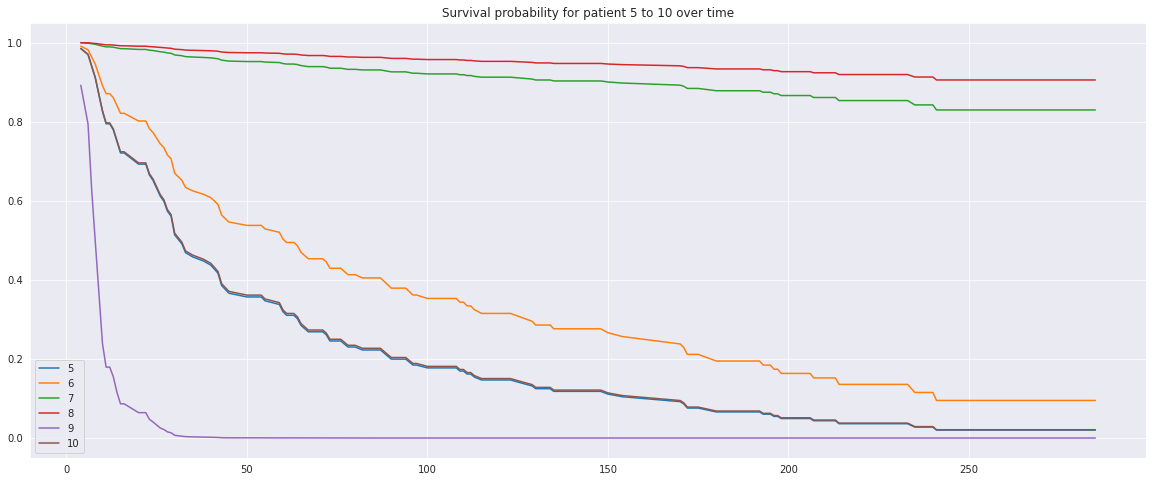

In [ ]:
cph.predict_survival_function(tr_rows).plot(title="Survival probability for patient 5 to 10 over time");

In [ ]:
model_survival_plotgragh = cph.predict_survival_function(user's input value ).plot(title="Survival probability for user")